In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
tf.keras.utils.get_file(
    fname='rockpaperscissors.zip', origin='https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip', md5_hash=None, file_hash=None, hash_algorithm='auto',
    extract=True, archive_format='auto', cache_dir=None
)

322879488/322873683 [==============================] - 356s 1us/step


'/root/.keras/datasets/rockpaperscissors.zip'

In [4]:
import pathlib
data_dir = pathlib.Path('/root/.keras/datasets/rockpaperscissors/rps-cv-images')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2188


In [5]:
batch_size = 32
img_height = 200
img_width = 200

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4) # set validation split

In [7]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
class_names = train_generator.class_indices
print(class_names)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [9]:
class_names = list(class_names)
print(class_names)

['paper', 'rock', 'scissors']


In [10]:
print(class_names[0])

paper


In [11]:
num_classes= len(class_names)
print(num_classes)


3


In [12]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=25
)

Epoch 1/25
42/42 [==============================] - 83s 2s/step - loss: 1.7652 - accuracy: 0.4543 - val_loss: 1.0617 - val_accuracy: 0.3936
Epoch 2/25
42/42 [==============================] - 82s 2s/step - loss: 0.7949 - accuracy: 0.6788 - val_loss: 0.7683 - val_accuracy: 0.6098
Epoch 3/25
42/42 [==============================] - 81s 2s/step - loss: 0.5056 - accuracy: 0.8037 - val_loss: 0.3936 - val_accuracy: 0.8799
Epoch 4/25
42/42 [==============================] - 80s 2s/step - loss: 0.3443 - accuracy: 0.8744 - val_loss: 0.2898 - val_accuracy: 0.8947
Epoch 5/25
42/42 [==============================] - 81s 2s/step - loss: 0.2844 - accuracy: 0.8935 - val_loss: 0.2598 - val_accuracy: 0.9142
Epoch 6/25
42/42 [==============================] - 81s 2s/step - loss: 0.2571 - accuracy: 0.9102 - val_loss: 0.3039 - val_accuracy: 0.8844
Epoch 7/25
42/42 [==============================] - 81s 2s/step - loss: 0.2272 - accuracy: 0.9140 - val_loss: 0.2466 - val_accuracy: 0.9096
Epoch 8/25
42/42 [==

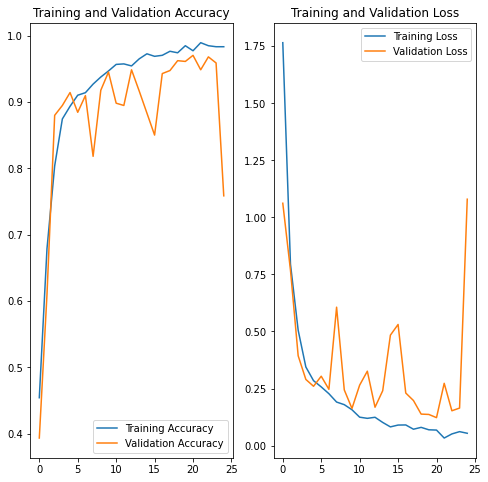

In [15]:
epochs = 25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Accuracy: 0.9588100910186768


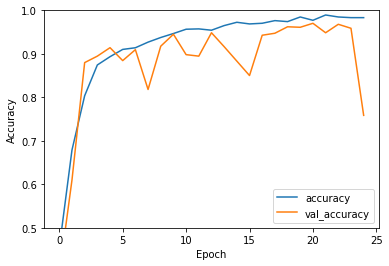

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

print('Accuracy:', val_acc[23])

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (1).png
Gambar adalah rock dengan akurasi 100.00%.


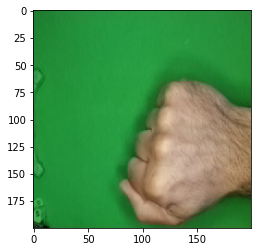

In [17]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
  path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  imgplot = plt.imshow(img)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "Gambar adalah {} dengan akurasi {:.2f}%."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

Saving 4Zh2kADxqxEsPTrX.png to 4Zh2kADxqxEsPTrX.png
Gambar adalah scissors dengan akurasi 100.00%.


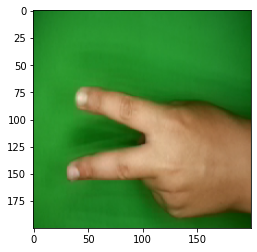

In [18]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
  path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  imgplot = plt.imshow(img)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "Gambar adalah {} dengan akurasi {:.2f}%."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
Gambar adalah paper dengan akurasi 100.00%.


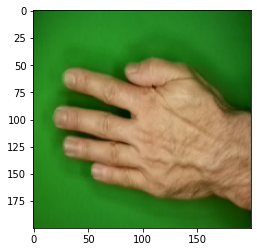

In [19]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
  path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  imgplot = plt.imshow(img)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "Gambar adalah {} dengan akurasi {:.2f}%."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

Saving 433-4337770_five-finger-hand-png-image-back-of-hand.png to 433-4337770_five-finger-hand-png-image-back-of-hand.png
Gambar adalah paper dengan akurasi 100.00%.


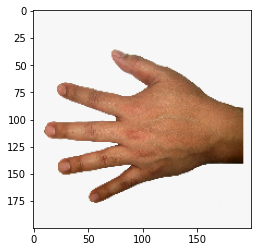

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
  path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  imgplot = plt.imshow(img)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "Gambar adalah {} dengan akurasi {:.2f}%."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )